In [1389]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import datetime
from collections import defaultdict
from functools import reduce
from prophet import Prophet
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import warnings

warnings.filterwarnings( "ignore" )


Cab_Data_df = pd.read_csv('Cab_Data.csv')
City_df = pd.read_csv('City.csv')
Customer_ID_df = pd.read_csv('Customer_ID.csv')
Transaction_ID_df = pd.read_csv('Transaction_ID.csv')

In [1390]:
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [1391]:
Cab_Data_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [1392]:
Cab_Data_df['Profit'] = np.subtract(Cab_Data_df['Price Charged'] , Cab_Data_df['Cost of Trip'])
Cab_Data_df['Date of Travel'] = pd.to_datetime(Cab_Data_df['Date of Travel'])

In [1393]:
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [1394]:
company_grouping = Cab_Data_df.groupby(["Company"])
Pink_Cab_df = company_grouping.get_group("Pink Cab")
PC_totalProfit = Pink_Cab_df['Profit'].sum()
PC_totalSales = Pink_Cab_df['Price Charged'].sum()
PC_totalRides =  len(Pink_Cab_df)
print(PC_totalProfit)
print( PC_totalRides )

5307328.321
84711


In [1395]:
company_grouping = Cab_Data_df.groupby(["Company"])
Yellow_Cab_df = company_grouping.get_group("Yellow Cab")
YC_totalProfit = Yellow_Cab_df['Profit'].sum()
YC_totalSales = Yellow_Cab_df['Price Charged'].sum()
YC_totalRides = len(Yellow_Cab_df)
print(YC_totalProfit)
print( YC_totalRides )

44020373.17080001
274681


In [1396]:

# Creating a train dataset
train_prophet = Yellow_Cab_df.copy()
train_prophet.reset_index(level=0, inplace=True)
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Date of Travel': 'ds',
                                'Profit': 'y'})
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("W").sum()

# Fitting data to Prophet model
prophet_1 = Prophet(daily_seasonality=False) 
prophet_1.fit(train_prophet)
future_1 = prophet_1.make_future_dataframe(periods = 100, freq = "W") 
forecast_1 = prophet_1.predict(future_1)
forecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()
# Visualizing predicions of forecast
prophet_1.plot(forecast_1);


'\n# Creating a train dataset\ntrain_prophet = Yellow_Cab_df.copy()\ntrain_prophet.reset_index(level=0, inplace=True)\n# Converting col names to specific names as required by Prophet library\ntrain_prophet = train_prophet.rename(columns = {\'Date of Travel\': \'ds\',\n                                \'Profit\': \'y\'})\n# Downsampling to week because modelling on daily basis takes a lot of time\nts_week_prophet = train_prophet.set_index("ds").resample("W").sum()\n\n# Fitting data to Prophet model\nprophet_1 = Prophet(daily_seasonality=False) \nprophet_1.fit(train_prophet)\nfuture_1 = prophet_1.make_future_dataframe(periods = 100, freq = "W") \nforecast_1 = prophet_1.predict(future_1)\nforecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()\n# Visualizing predicions of forecast\nprophet_1.plot(forecast_1);\n'

In [1397]:

# Creating a train dataset
train_prophet = Pink_Cab_df.copy()
train_prophet.reset_index(level=0, inplace=True)
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Date of Travel': 'ds',
                                'Profit': 'y'})
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("W").sum()

# Fitting data to Prophet model
prophet_1 = Prophet(daily_seasonality=False) 
prophet_1.fit(train_prophet)
future_1 = prophet_1.make_future_dataframe(periods = 100, freq = "W") 
forecast_1 = prophet_1.predict(future_1)
forecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()
# Visualizing predicions of forecast
prophet_1.plot(forecast_1);


'\n# Creating a train dataset\ntrain_prophet = Pink_Cab_df.copy()\ntrain_prophet.reset_index(level=0, inplace=True)\n# Converting col names to specific names as required by Prophet library\ntrain_prophet = train_prophet.rename(columns = {\'Date of Travel\': \'ds\',\n                                \'Profit\': \'y\'})\n# Downsampling to week because modelling on daily basis takes a lot of time\nts_week_prophet = train_prophet.set_index("ds").resample("W").sum()\n\n# Fitting data to Prophet model\nprophet_1 = Prophet(daily_seasonality=False) \nprophet_1.fit(train_prophet)\nfuture_1 = prophet_1.make_future_dataframe(periods = 100, freq = "W") \nforecast_1 = prophet_1.predict(future_1)\nforecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()\n# Visualizing predicions of forecast\nprophet_1.plot(forecast_1);\n'

In [1398]:
"""
double_grouping = Cab_Data_df.groupby(["Company"])
PC_totalRides = 0
YC_totalRides = 0
if(double_grouping.groups.keys() == "Pink Cab"):
    PC_totalProfit = Cab_Data_df['Profit'].sum()
    PC_totalRides = Cab_Data_df['KM Travelled'].sum()
    
else:
    YC_totalProfit = Cab_Data_df['Profit'].sum()
    YC_totalRides = Cab_Data_df['KM Travelled'].sum()

"""

'\ndouble_grouping = Cab_Data_df.groupby(["Company"])\nPC_totalRides = 0\nYC_totalRides = 0\nif(double_grouping.groups.keys() == "Pink Cab"):\n    PC_totalProfit = Cab_Data_df[\'Profit\'].sum()\n    PC_totalRides = Cab_Data_df[\'KM Travelled\'].sum()\n    \nelse:\n    YC_totalProfit = Cab_Data_df[\'Profit\'].sum()\n    YC_totalRides = Cab_Data_df[\'KM Travelled\'].sum()\n\n'

In [1399]:
with open('ProfitAnalysis.csv', 'w') as Profit_Analysis_df:
    writerObj = csv.writer(Profit_Analysis_df)
    writerObj.writerow (["Company" ,"Profit", "Total Sales",  "Total Rides"] )
    writerObj.writerows( [['Pink Cab', PC_totalProfit , PC_totalSales, PC_totalRides],
                         ['Yellow Cab', YC_totalProfit, YC_totalSales, YC_totalRides]] )



In [1400]:
Profit_Analysis_df = pd.read_csv('ProfitAnalysis.csv')
Profit_Analysis_df['Profit per Ride'] = np.divide(Profit_Analysis_df['Profit'], Profit_Analysis_df['Total Rides'])

Profit_Analysis_df['Average Selling Price'] = np.divide(Profit_Analysis_df['Total Sales'],Profit_Analysis_df['Total Rides'])
Profit_Analysis_df.head()

,Company,Profit,Total Sales,Total Rides,Profit per Ride,Average Selling Price
0,Pink Cab,5.307328e+06,2.632825e+07,84711,62.652174,310.800856
1,Yellow Cab,4.402037e+07,1.258539e+08,274681,160.259986,458.181990


In [1401]:
yearly_grouping = Cab_Data_df.groupby(['Profit', 'Date of Travel'])
yearly_grouping.first()

,,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
Profit,Date of Travel,,,,,,
-220.0600,2017-02-19,10145287,Pink Cab,DALLAS TX,44.80,317.54,537.6000
-198.6980,2016-04-13,10024048,Pink Cab,DALLAS TX,42.56,303.51,502.2080
-176.9308,2016-08-28,10069188,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008
-168.9850,2016-04-05,10029696,Pink Cab,DALLAS TX,43.29,328.85,497.8350
-164.0400,2017-01-30,10141320,Pink Cab,DALLAS TX,48.00,354.36,518.4000
...,...,...,...,...,...,...,...
1408.3440,2017-04-30,10170703,Yellow Cab,NEW YORK NY,41.65,1918.14,509.7960
1424.1408,2017-04-30,10170519,Yellow Cab,NEW YORK NY,41.81,1981.05,556.9092
1433.3420,2017-04-30,10170737,Yellow Cab,NEW YORK NY,43.20,2013.95,580.6080


In [1402]:
Cab_Data_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
Profit                   float64
dtype: object

In [1403]:
def extract_year(date):

    year = re.findall(r'/(2.+)', date )

    return(int(''.join(year)) )

In [1404]:
Pink_Cab_df['Date of Travel'] = [x.year for x in Pink_Cab_df['Date of Travel']]
Yellow_Cab_df['Date of Travel'] = [x.year for x in Yellow_Cab_df['Date of Travel']]
Pink_Cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [1405]:
pc_yearly_grouping = Pink_Cab_df.groupby(["Date of Travel"])
yc_yearly_grouping = Yellow_Cab_df.groupby(["Date of Travel"])
years = [y for y in range(2016,2018+1)]
pc_yearly_profit = []
yc_yearly_profit = []
pc_yearly_sales = []
yc_yearly_sales = []
pc_yearly_grossprofit = []
yc_yearly_grossprofit = []
pc_yearly_rides = []
yc_yearly_rides = []

for i in range(len(years)):
    pc_yearly_profit.append(pc_yearly_grouping.get_group(years[i])['Profit'].sum())
    yc_yearly_profit.append(yc_yearly_grouping.get_group(years[i])['Profit'].sum())
    pc_yearly_sales.append(pc_yearly_grouping.get_group(years[i])['Price Charged'].sum())
    yc_yearly_sales.append(yc_yearly_grouping.get_group(years[i])['Price Charged'].sum())
    pc_yearly_rides.append(pc_yearly_grouping.get_group(years[i])['KM Travelled'].sum())
    yc_yearly_rides.append(yc_yearly_grouping.get_group(years[i])['KM Travelled'].sum())

pc_yearly_grossprofit = np.multiply(np.divide(pc_yearly_profit,pc_yearly_sales), 100)
yc_yearly_grossprofit = np.multiply(np.divide(yc_yearly_profit,yc_yearly_sales),100)

print(*pc_yearly_profit, sep=', ')
print(*yc_yearly_profit, sep=', ')
print(*pc_yearly_rides, sep=', ')
print(*yc_yearly_rides, sep=', ')
print(*pc_yearly_grossprofit)
print(*yc_yearly_grossprofit)

1713511.2240000002, 2033654.9080000003, 1560162.189
13926995.4316, 16575977.967999997, 13517399.7712
563509.67, 685823.52, 661739.9199999999
1859978.2100000002, 2214879.02, 2124560.24
21.666760121212334 21.231167773088348 17.646612735990086
36.19174977632507 36.17715470212874 32.52984195868606


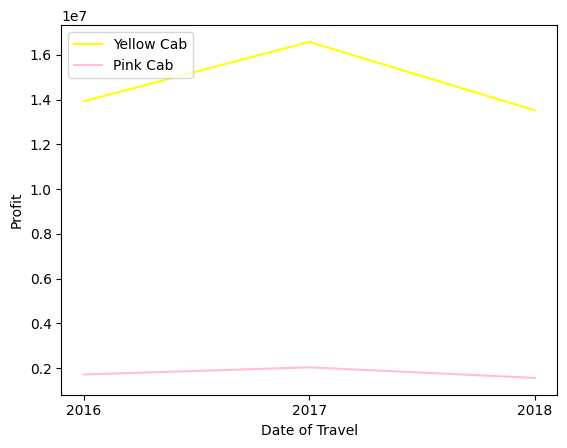

In [1406]:

plt.plot(yc_yearly_profit, color='yellow')
plt.plot(pc_yearly_profit, color='pink')
plt.xlabel('Date of Travel')
plt.xticks(np.arange(3),['2016','2017','2018'])
plt.ylabel('Profit')
plt.legend(['Yellow Cab', 'Pink Cab'], loc=2)

plt.show()

In [1407]:
with open('YearlyProfitAnalysis.csv', 'w') as YearlyProfit_Analysis_df:
    writerObj = csv.writer(YearlyProfit_Analysis_df)
    writerObj.writerow (["Company" ,"Year", "Profit", "Total Distance Travelled",  "Average Profit per KM", "Profit % Yearwise"] )
    #writerObj.writerows( [['Pink Cab', 2016 , pc_yearly_profit[0]],
                       # ['Yellow Cab', YC_totalProfit, YC_totalRides]] )
#np.savetxt('YearlyProfitAnalysis.csv', years, fmt='%d', delimiter=',', header="Year")

YearlyProfit_Analysis_df = pd.read_csv('YearlyProfitAnalysis.csv')

YearlyProfit_Analysis_df['Year'] = 2*years

YearlyProfit_Analysis_df['Company'] =  3*['Pink Cab'] + 3*['Yellow Cab']
YearlyProfit_Analysis_df['Profit'] = pc_yearly_profit + yc_yearly_profit
YearlyProfit_Analysis_df['Total Distance Travelled'] = pc_yearly_rides + yc_yearly_rides
YearlyProfit_Analysis_df['Average Profit per KM'] = np.divide(YearlyProfit_Analysis_df['Profit'], YearlyProfit_Analysis_df['Total Distance Travelled'])
YearlyProfit_Analysis_df['Profit % Yearwise'] = [*pc_yearly_grossprofit , *yc_yearly_grossprofit]
YearlyProfit_Analysis_df.head(6)

,Company,Year,Profit,Total Distance Travelled,Average Profit per KM,Profit % Yearwise
0,Pink Cab,2016,1.713511e+06,563509.67,3.040784,21.666760
1,Pink Cab,2017,2.033655e+06,685823.52,2.965274,21.231168
2,Pink Cab,2018,1.560162e+06,661739.92,2.357667,17.646613
3,Yellow Cab,2016,1.392700e+07,1859978.21,7.487720,36.191750
4,Yellow Cab,2017,1.657598e+07,2214879.02,7.483920,36.177155
5,Yellow Cab,2018,1.351740e+07,2124560.24,6.362446,32.529842


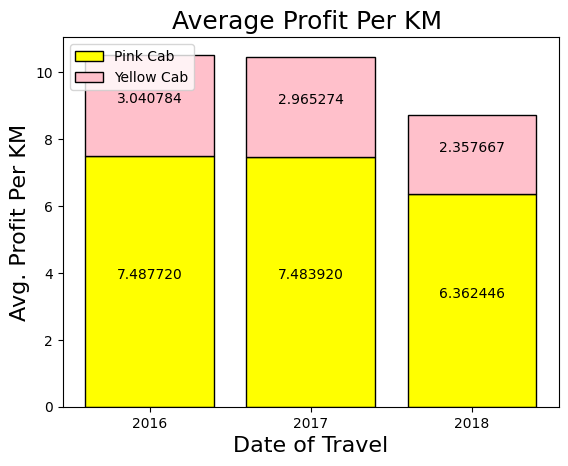

In [1408]:
pos = np.arange(3)
yellow_cab_df = YearlyProfit_Analysis_df.loc[YearlyProfit_Analysis_df['Company'] == 'Yellow Cab']
pink_cab_df = YearlyProfit_Analysis_df.loc[YearlyProfit_Analysis_df['Company'] == 'Pink Cab']
YC_Yearly_AVG_PROFIT_PER_KM = yellow_cab_df['Average Profit per KM']
PC_Yearly_AVG_PROFIT_PER_KM = pink_cab_df['Average Profit per KM']
barY = plt.bar(pos, YC_Yearly_AVG_PROFIT_PER_KM, color='yellow',edgecolor='black')
barP = plt.bar(pos, PC_Yearly_AVG_PROFIT_PER_KM, color='pink',edgecolor='black', bottom= YC_Yearly_AVG_PROFIT_PER_KM)

for rectangle in barY:
  height = rectangle.get_height()
  plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
  height, '%f' % (height), ha='center', va = 'bottom')
for rectangle in barP:
  height = rectangle.get_height()
  plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
  height, '%f' % (height), ha='center', va = 'bottom')

plt.xticks(pos, years)
plt.xlabel('Date of Travel', fontsize=16)
plt.ylabel('Avg. Profit Per KM', fontsize=16)
plt.title('Average Profit Per KM ',fontsize=18)
plt.legend(['Pink Cab','Yellow Cab'],loc=2)

plt.show()

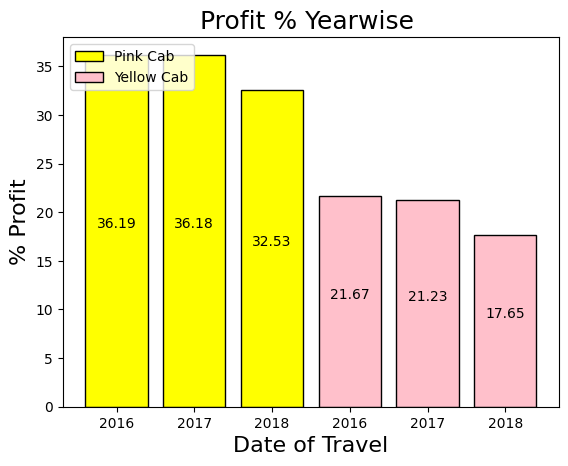

In [1409]:
pos = np.arange(6)
yellow_cab_df = YearlyProfit_Analysis_df.loc[YearlyProfit_Analysis_df['Company'] == 'Yellow Cab']
pink_cab_df = YearlyProfit_Analysis_df.loc[YearlyProfit_Analysis_df['Company'] == 'Pink Cab']
YC_PROFIT_YEARWISE = yellow_cab_df['Profit % Yearwise']
PC_PROFIT_YEARWISE = pink_cab_df['Profit % Yearwise']
barY = plt.bar(np.arange(3), YC_PROFIT_YEARWISE, color='yellow',edgecolor='black')
barP = plt.bar(np.arange(3,6), PC_PROFIT_YEARWISE, color='pink',edgecolor='black')

for rectangle in barY:
  height = rectangle.get_height()
  plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
  height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in barP:
  height = rectangle.get_height()
  plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
  height, '%.2f' % (height), ha='center', va = 'bottom')

plt.xticks(pos, 2*years)
plt.xlabel('Date of Travel', fontsize=16)
plt.ylabel('% Profit', fontsize=16)
plt.title('Profit % Yearwise ',fontsize=18)
plt.legend(['Pink Cab','Yellow Cab'],loc=2)

plt.show()

In [1410]:
companyyear_grouping = Cab_Data_df.groupby(["Company","Date of Travel"])

In [1411]:
companycity_grouping = Cab_Data_df.groupby(["Company","City"])
city_names = Cab_Data_df.groupby(["City"]).groups.keys()
PC_ProfitableRides = []
YC_ProfitableRides = []

for city in city_names:
    Pink_Cab_df = companycity_grouping.get_group(("Pink Cab", city))
    Yellow_Cab_df = companycity_grouping.get_group(("Yellow Cab", city))

#Pink_Cab_df.head(10)
#print(Pink_Cab_df['Profit'])
   

    PC_TotalProfitableRides = Pink_Cab_df['Profit'].sum()
    PC_TotalSalesOfProfitableRides  =  Pink_Cab_df['Price Charged'].sum()
    gross_profit_percent_pc = (PC_TotalProfitableRides/PC_TotalSalesOfProfitableRides) * 100
    PC_ProfitableRides.append(gross_profit_percent_pc)


    YC_TotalProfitableRides = Yellow_Cab_df['Profit'].sum()
    YC_TotalSalesOfProfitableRides  =  Yellow_Cab_df['Price Charged'].sum()
    gross_profit_percent_yc = (YC_TotalProfitableRides/YC_TotalSalesOfProfitableRides) * 100
    YC_ProfitableRides.append(gross_profit_percent_yc)


In [1412]:
print(*PC_ProfitableRides)
print(*YC_ProfitableRides)

18.042458821712845 24.632811943598295 16.809419285675908 12.090287675968131 6.891770432906006 10.540824726170596 18.542088690175802 24.867471522089378 12.379621629725404 30.306743528517366 21.60486223308591 14.697244491216143 9.159018151922965 14.295321474382613 19.41047943527288 14.175210770810507 26.326795374383472 22.95841979266179 17.495737179158418
30.490914609288655 29.662497750709406 17.119659582374254 17.835322959601665 39.66106231471192 33.132094377003014 28.026824052080485 30.921356853713206 19.38191462049476 50.89995352881724 32.786639237800266 30.58291662204275 26.610925419737146 16.551387193729017 24.656048698242618 23.893976476536274 40.82696659787503 19.542540108414823 21.620427645352457


In [1413]:
with open('CityWiseProfitAnalysis.csv', 'w') as CityWiseProfit_Analysis_df:
    writerObj = csv.writer(CityWiseProfit_Analysis_df)
    writerObj.writerow(["City",  "Pink Cab_Profitable Rides in %", "Yellow Cab_Profitable Rides in %"])
    

CityWiseProfit_Analysis_df = pd.read_csv('CityWiseProfitAnalysis.csv')

CityWiseProfit_Analysis_df['City'] = city_names
CityWiseProfit_Analysis_df['Pink Cab_Profitable Rides in %'] = PC_ProfitableRides
CityWiseProfit_Analysis_df['Yellow Cab_Profitable Rides in %'] = YC_ProfitableRides


CityWiseProfit_Analysis_df.head(19)

,City,Pink Cab_Profitable Rides in %,Yellow Cab_Profitable Rides in %
0,ATLANTA GA,18.042459,30.490915
1,AUSTIN TX,24.632812,29.662498
2,BOSTON MA,16.809419,17.119660
3,CHICAGO IL,12.090288,17.835323
4,DALLAS TX,6.891770,39.661062
5,DENVER CO,10.540825,33.132094
6,LOS ANGELES CA,18.542089,28.026824
7,MIAMI FL,24.867472,30.921357
8,NASHVILLE TN,12.379622,19.381915
9,NEW YORK NY,30.306744,50.899954


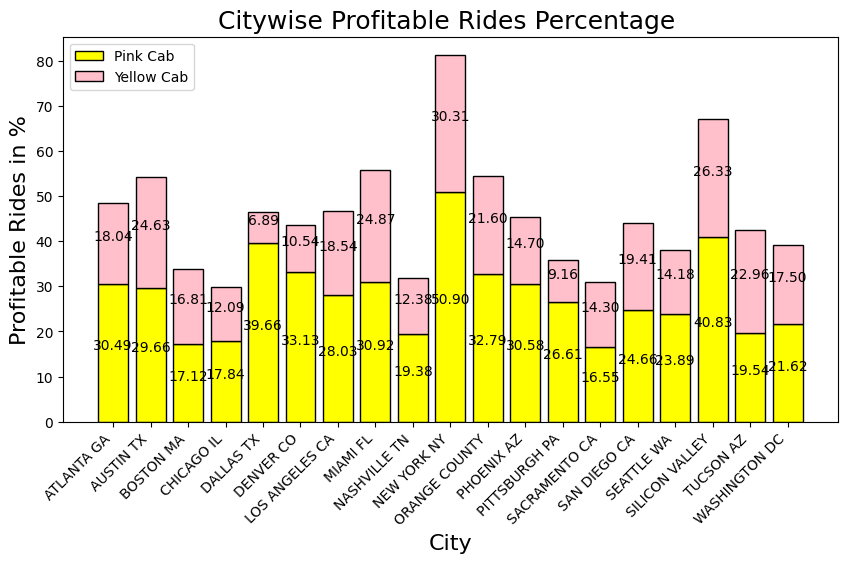

In [1414]:
pos = np.arange(len(city_names))
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,YC_ProfitableRides,color='yellow',edgecolor='black' )
bar2 = plt.bar(pos,PC_ProfitableRides,color='pink',edgecolor='black',bottom=YC_ProfitableRides)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%.2f' % (height), ha='center', va = 'bottom') 
    
plt.xticks(pos, city_names)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('City', fontsize=16)
plt.ylabel('Profitable Rides in %', fontsize=16)
plt.title('Citywise Profitable Rides Percentage ',fontsize=18)
plt.legend(['Pink Cab','Yellow Cab'],loc=2)

plt.show()

In [1415]:
def using_concat(dfs):
    df1, df2 = dfs
    result = pd.concat([df1,df2], sort=False)
    n = result.index.nlevels
    return result.groupby(level=range(n)).first()

def cg(x):
    cnt = defaultdict(lambda: 0)

    for j in x.tolist():
        cnt[j] += 1
        yield cnt[j]


def fastcount(x):
    return [i for i in cg(x)]



In [1416]:
"""
combined_df = using_concat([Cab_Data_df,Transaction_ID_df])
#combined_df.head()
new_Cab_Data_df = using_concat([combined_df,Customer_ID_df])
new_Cab_Data_df.head()

Cab_Data_df['cc'] = fastcount(Cab_Data_df['Transaction ID'].values)
Transaction_ID_df['cc'] = fastcount(Transaction_ID_df['Transaction ID'].values)

combined_df = Cab_Data_df.merge(Transaction_ID_df, how='inner').drop('cc', 1)

combined_df['cc'] = fastcount(combined_df['Customer ID'].values)
Transaction_ID_df['cc'] = fastcount(Customer_ID_df['Customer ID'].values)
new_Cab_Data_df = combined_df.merge(Customer_ID_df, how='inner').drop('cc', 1)
"""

combined_df = Transaction_ID_df.merge(Customer_ID_df, on= 'Customer ID', how='inner')
new_Cab_Data_df = combined_df.merge(Cab_Data_df, on= 'Transaction ID', how='inner')
new_Cab_Data_df.head()






,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,Male,28,10813,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808


In [1417]:
#drop nan outliers
new_Cab_Data_df = new_Cab_Data_df.replace(to_replace='None', value=np.nan).dropna()
new_Cab_Data_df['Date of Travel'] = [x.year for x in new_Cab_Data_df['Date of Travel']]


In [1418]:
yearly_Male_GP_PinkCab_df = []
yearly_Female_GP_PinkCab_df = []
yearly_Male_GP_YellowCab_df = []
yearly_Female_GP_YellowCab_df = []

for year in years:
    Male_PinkCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Pink Cab', year, 'Male'))
    Female_PinkCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Pink Cab', year, 'Female'))
    Male_YellowCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Yellow Cab', year, 'Male'))
    Female_YellowCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Yellow Cab', year, 'Female'))

    yearly_Male_GP_PinkCab_df.append( (Male_PinkCab_df['Profit'].sum() / Male_PinkCab_df['Price Charged'].sum()) * 100 )
    yearly_Female_GP_PinkCab_df.append( (Female_PinkCab_df['Profit'].sum() / Female_PinkCab_df['Price Charged'].sum()) * 100 )

    yearly_Male_GP_YellowCab_df.append( (Male_YellowCab_df['Profit'].sum() / Male_YellowCab_df['Price Charged'].sum()) * 100 )
    yearly_Female_GP_YellowCab_df.append( (Female_YellowCab_df['Profit'].sum() / Female_YellowCab_df['Price Charged'].sum()) * 100 )

print(*yearly_Male_GP_PinkCab_df)
print(*yearly_Female_GP_PinkCab_df)
print(*yearly_Male_GP_YellowCab_df)
print(*yearly_Female_GP_YellowCab_df)

21.79353578303835 21.343242240137933 17.69546429350023
21.50076548598216 21.09080863322908 17.58653525940899
36.65908128079442 36.55470101905464 32.93571913891436
35.514768210677104 35.6611886503922 31.98039029761392


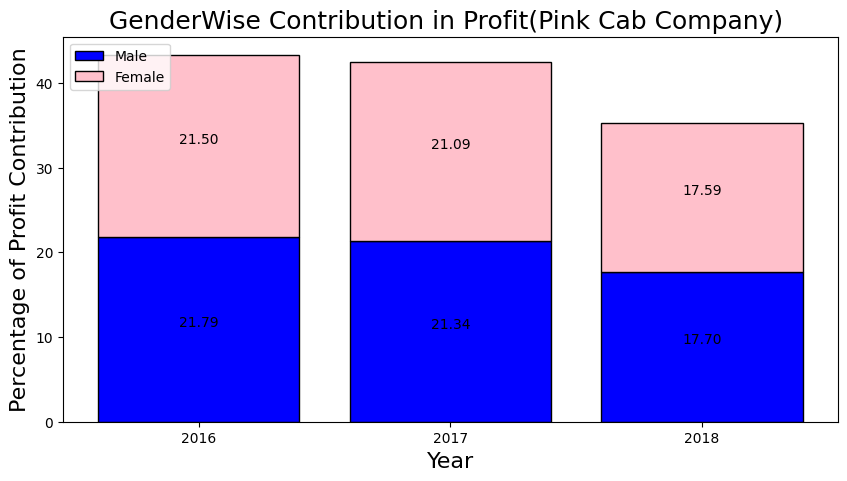

In [1419]:
pos = np.arange(3)
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,yearly_Male_GP_PinkCab_df,color='blue',edgecolor='black' )
bar2 = plt.bar(pos,yearly_Female_GP_PinkCab_df,color='pink',edgecolor='black',bottom=yearly_Male_GP_PinkCab_df)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%.2f' % (height), ha='center', va = 'bottom') 
    
plt.xticks(pos, years)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Profit Contribution', fontsize=16)
plt.title('GenderWise Contribution in Profit(Pink Cab Company) ',fontsize=18)
plt.legend(['Male','Female'],loc=2)

plt.show()


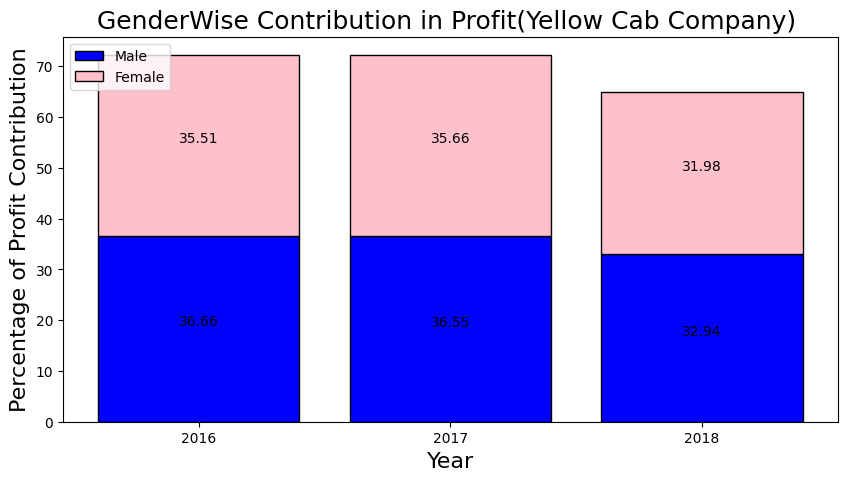

In [1420]:
pos = np.arange(3)
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,yearly_Male_GP_YellowCab_df,color='blue',edgecolor='black' )
bar2 = plt.bar(pos,yearly_Female_GP_YellowCab_df,color='pink',edgecolor='black',bottom=yearly_Male_GP_YellowCab_df)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%.2f' % (height), ha='center', va = 'bottom') 
    
plt.xticks(pos, years)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Profit Contribution', fontsize=16)
plt.title('GenderWise Contribution in Profit(Yellow Cab Company) ',fontsize=18)
plt.legend(['Male','Female'],loc=2)

plt.show()

In [1421]:
def extract_base10int(numobj):

    base10int = numobj.replace(',','')

    return(int(''.join(base10int)) )

In [1422]:
City_df['Users'] = [extract_base10int(x) for x in City_df['Users']]
City_df['Population'] = [extract_base10int(x) for x in City_df['Population']]
"""
new_Cab_Data_df['cc'] = fastcount(new_Cab_Data_df['City'].values)
City_df['cc'] = fastcount(City_df['City'].values)

new_Cab_Data_df = new_Cab_Data_df.merge(City_df, how='outer').drop('cc', 1)
"""

new_Cab_Data_df = new_Cab_Data_df.merge(City_df, on= 'City', how='inner')

#new_Cab_Data_df = new_Cab_Data_df.replace(to_replace='None', value=np.nan).dropna()
new_Cab_Data_df.head()
#new_Cab_Data_df.isna().sum()
#new_Cab_Data_df.dtypes



,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users
0,10000011,29290,Card,Male,28,10813,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885,24701
1,10351127,29290,Cash,Male,28,10813,2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,814885,24701
2,10412921,29290,Card,Male,28,10813,2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,814885,24701
3,10000012,27703,Card,Male,27,9237,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885,24701
4,10320494,27703,Card,Male,27,9237,2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,814885,24701


In [1423]:
new_Cab_Data_df.describe()
new_Cab_Data_df.shape


(359392, 15)

In [1424]:
def detectOutliers(data):
    # IQR
    Q1 = np.percentile(data, 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    print(IQR)

    # Above Upper bound
    upper = data >= (Q3+1.5*IQR)
 
    print("Upper bound:",upper)
    print((np.where(upper)))
 
    # Below Lower bound
    lower = data <= (Q1-1.5*IQR)
    print("Lower bound:", lower)
    print((np.where(lower)))

In [1425]:
def _sum(arr):
 
    # iterate over array
    # using reduce and get
    # sum on accumulator
    sum = reduce(lambda a, b: a+b, arr)
 
    return(sum)

In [1426]:
yearly_Male_Customers_PinkCab_df = []
yearly_Female_Customers_PinkCab_df = []
yearly_Male_Customers_YellowCab_df = []
yearly_Female_Customers_YellowCab_df = []

PinkCab_Users = []
Yellow_Cab_Users = []

for year in years:
    Male_PinkCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Pink Cab', year, 'Male'))
    Female_PinkCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Pink Cab', year, 'Female'))
    Male_YellowCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Yellow Cab', year, 'Male'))
    Female_YellowCab_df = new_Cab_Data_df.groupby(['Company','Date of Travel','Gender']).get_group(('Yellow Cab', year, 'Female'))

    total_PinkCab_Users =  len(Male_PinkCab_df) + len(Female_PinkCab_df) 
    PinkCab_Users.append(total_PinkCab_Users)
    total_YellowCab_Users = len(Male_YellowCab_df) + len(Female_YellowCab_df)
    Yellow_Cab_Users.append(total_YellowCab_Users)

    yearly_Male_Customers_PinkCab_df.append( (len(Male_PinkCab_df) / total_PinkCab_Users ) * 100  )
    yearly_Female_Customers_PinkCab_df.append( (len(Female_PinkCab_df) / total_PinkCab_Users) * 100 )

    yearly_Male_Customers_YellowCab_df.append( (len(Male_YellowCab_df) / total_YellowCab_Users) * 100 )
    yearly_Female_Customers_YellowCab_df.append( (len(Female_YellowCab_df) / total_YellowCab_Users) * 100 )

all_PinkCab_Users = _sum(PinkCab_Users)
all_YellowCab_Users = _sum(Yellow_Cab_Users)

print(*yearly_Male_Customers_PinkCab_df)
print(*yearly_Female_Customers_PinkCab_df)
print(*yearly_Male_Customers_YellowCab_df)
print(*yearly_Female_Customers_YellowCab_df)

print(all_PinkCab_Users)
print(all_YellowCab_Users)

56.64673046251993 55.55885359981531 55.19617877857387
43.35326953748007 44.44114640018469 44.80382122142613
58.826104403020466 57.44431657313955 57.18544767805799
41.173895596979534 42.55568342686044 42.81455232194201
84711
274681


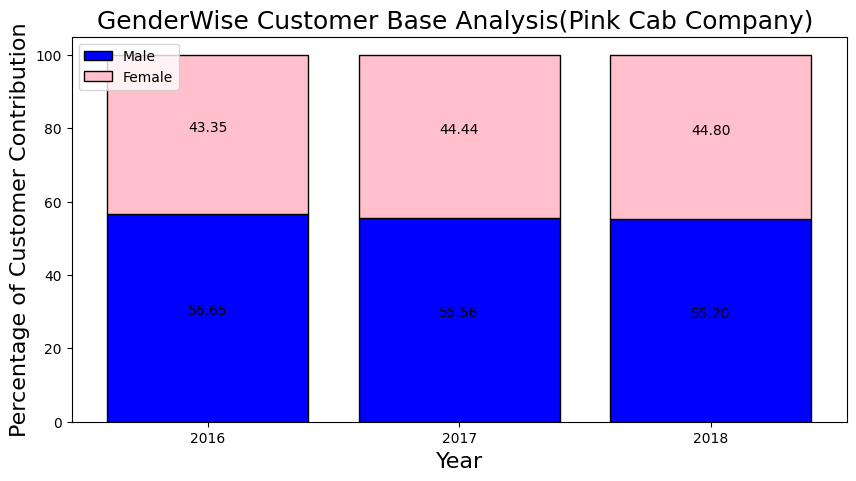

In [1427]:
pos = np.arange(3)
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,yearly_Male_Customers_PinkCab_df,color='blue',edgecolor='black' )
bar2 = plt.bar(pos,yearly_Female_Customers_PinkCab_df,color='pink',edgecolor='black',bottom=yearly_Male_Customers_PinkCab_df)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%.2f' % (height), ha='center', va = 'bottom') 
    
plt.xticks(pos, years)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Customer Contribution', fontsize=16)
plt.title('GenderWise Customer Base Analysis(Pink Cab Company) ',fontsize=18)
plt.legend(['Male','Female'],loc=2)

plt.show()

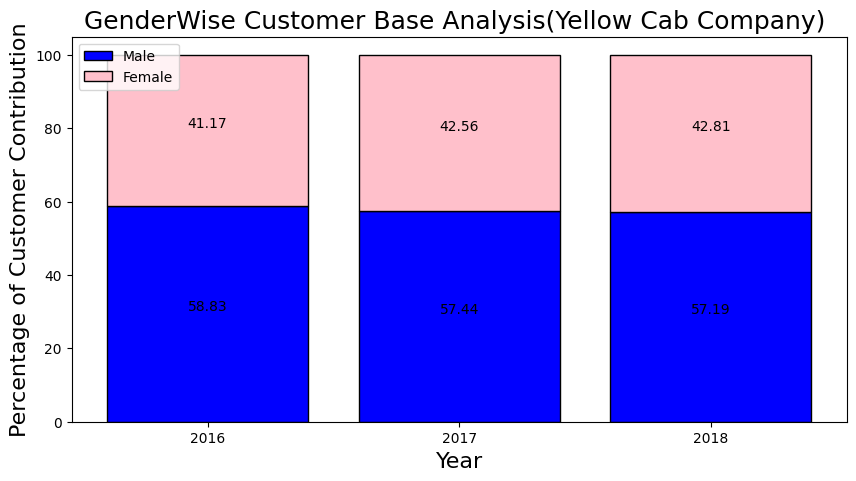

In [1428]:
pos = np.arange(3)
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,yearly_Male_Customers_YellowCab_df,color='blue',edgecolor='black' )
bar2 = plt.bar(pos,yearly_Female_Customers_YellowCab_df,color='pink',edgecolor='black',bottom=yearly_Male_Customers_YellowCab_df)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%.2f' % (height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%.2f' % (height), ha='center', va = 'bottom') 
    
plt.xticks(pos, years)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Percentage of Customer Contribution', fontsize=16)
plt.title('GenderWise Customer Base Analysis(Yellow Cab Company) ',fontsize=18)
plt.legend(['Male','Female'],loc=2)

plt.show()

In [1429]:
Yellow_Cab_User_Coverage_per_city = []
Pink_Cab_User_Coverage_per_city = []

for city in city_names:

    Yellow_Cab_User_Coverage_per_city.append( (all_YellowCab_Users / City_df._get_value(City_df.index[City_df['City'] == city].tolist()[0],'Users')) )

    Pink_Cab_User_Coverage_per_city.append( (all_PinkCab_Users / City_df._get_value(City_df.index[City_df['City'] == city].tolist()[0],'Users')) )

print(*Yellow_Cab_User_Coverage_per_city)
print(*Pink_Cab_User_Coverage_per_city)

11.12023804704263 18.33896381359327 3.432611439497132 1.6701181992849672 12.397030283883197 22.11424200950004 1.905759997779813 15.54065063649222 29.631175836030206 0.909091209965944 21.139064183469294 44.7873797488994 75.39967060115289 38.9950312322544 3.9242945924708907 10.959621753181981 10.081146548243844 48.08841036414566 2.1628254895630743
3.429456297315898 5.655695019361731 1.0586096149760689 0.515060680497118 3.8232161393690482 6.819982288060543 0.5877320789276497 4.792701555869873 9.138187702265371 0.2803616758619092 6.519239649068801 13.812326756888961 23.253088114191602 12.025979557069848 1.2102435888277734 3.3799225950604477 3.1090028259991924 14.830357142857142 0.6670104959803466


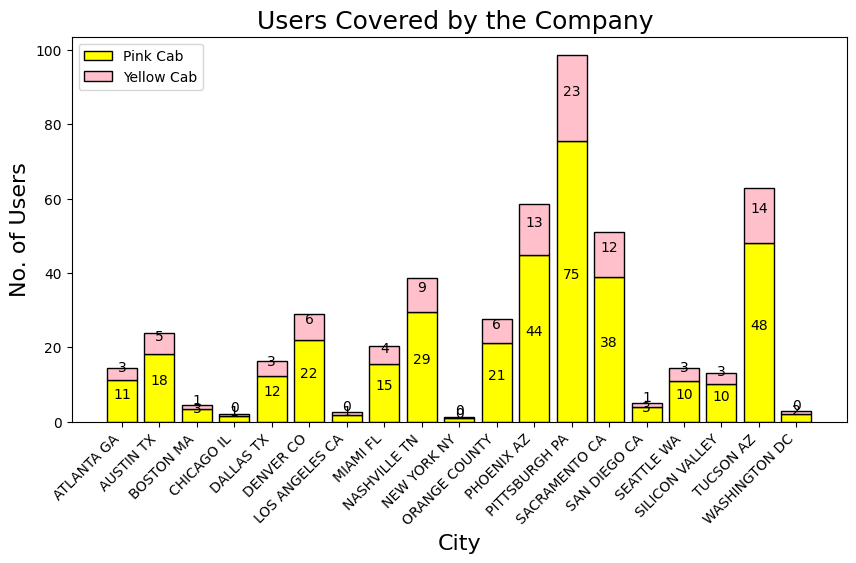

In [1430]:
pos = np.arange(len(city_names))
fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,Yellow_Cab_User_Coverage_per_city,color='yellow',edgecolor='black' )
bar2 = plt.bar(pos,Pink_Cab_User_Coverage_per_city,color='pink',edgecolor='black', bottom=Yellow_Cab_User_Coverage_per_city)
for rectangle in bar1:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
    height, '%d' % int(height), ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
    height ,'%d' % int(height), ha='center', va = 'bottom') 
    
plt.xticks(pos, city_names)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('City', fontsize=16)
plt.ylabel('No. of Users', fontsize=16)
plt.title('Users Covered by the Company ',fontsize=18)
plt.legend(['Pink Cab','Yellow Cab'],loc=2)

plt.show()

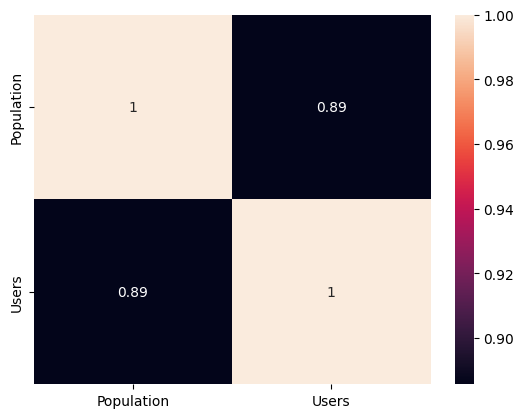

In [1431]:
pink_cab_df = new_Cab_Data_df.groupby('Company').get_group('Pink Cab')
pc_corr = pink_cab_df['Population'].corr(pink_cab_df['Users'],method='pearson')
# Remove all columns between column index 1 to 3
pink_cab_df.drop(pink_cab_df.iloc[:, 0:13], inplace=True, axis=1)


#plotting the heatmap for correlation
ax = sns.heatmap(pink_cab_df.corr(), annot=True)
#there is strong correlation between users and population for pink cab company

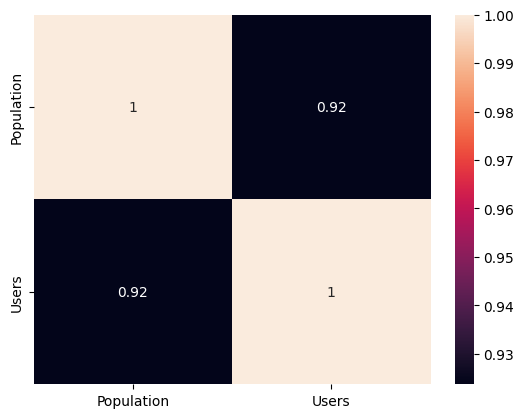

In [1432]:
yellow_cab_df = new_Cab_Data_df.groupby('Company').get_group('Yellow Cab')
yellow_cab_df['Population'].corr(yellow_cab_df['Users'],method='pearson')
yellow_cab_df.drop(yellow_cab_df.iloc[:, 0:13], inplace=True, axis=1)

#plotting the heatmap for correlation
ax = sns.heatmap(yellow_cab_df.corr(), annot=True)
#there is strong correlation between users and population for yellow cab company

In [1433]:
#I tried to display the yearly age grouping for each company in bar chart representation, but the code needs some readjustments

colors = ['blue', 'orange' , 'red', 'green']
company_names = ['Yellow Cab', 'Pink Cab']
YC_Profit_yearly_age_grouping = [ [0]*4 for i in range(3)]
PC_Profit_yearly_age_grouping = [ [0]*4 for i in range(3)]

pos = np.arange(len(years))

for year in years:
  yellow_cab_df = new_Cab_Data_df.groupby(['Company','Date of Travel']).get_group(('Yellow Cab',year))
  pink_cab_df = new_Cab_Data_df.groupby(['Company','Date of Travel']).get_group(('Pink Cab',year))
  yellow_cab_age_grouping_df = [(yellow_cab_df[yellow_cab_df['Age'].between(18,25)]), (yellow_cab_df[yellow_cab_df['Age'].between(26,40)]), (yellow_cab_df[yellow_cab_df['Age'].between(41,60)]), (yellow_cab_df[yellow_cab_df['Age']>60])] 
  pink_cab_age_grouping_df = [(pink_cab_df[pink_cab_df['Age'].between(18,25)]), (pink_cab_df[pink_cab_df['Age'].between(26,40)]), (pink_cab_df[pink_cab_df['Age'].between(41,60)]), (pink_cab_df[pink_cab_df['Age']>60])] 
  YC_Profit_yearly_age_grouping[year%2016] = [x['Profit'].sum() for x in yellow_cab_age_grouping_df]
  PC_Profit_yearly_age_grouping[year%2016] = [x['Profit'].sum() for x in pink_cab_age_grouping_df]

print('Yearly ProfitShare by Age group: [18-25],[26-40],[41-60],[>60] ')
print('Yellow Cab Company: ')
for i in range(3):
  print('year: {:d}'.format(2016+i) )
  print(*YC_Profit_yearly_age_grouping[i], sep=', ')
print('Pink Cab Company: ')
for i in range(3):
  print('year: {:d}'.format(2016+i) )
  print(*PC_Profit_yearly_age_grouping[i],sep=', ')
"""
barsY = []
barsP = []
width = 0.25     

for index in range(4):
 barsY.append( plt.bar(pos, YC_Profit_yearly_age_grouping[:][index] , width, color=colors[index] ,edgecolor='black', bottom = YC_Profit_yearly_age_grouping[:][(index-1)%index]  ) )
 barP.append(plt.bar(pos+width, PC_Profit_yearly_age_grouping[:][index] , width, color=colors[index] ,edgecolor='black' ) )

 for bar in barsY:
  for rectangle in bar:
    height = rectangle.get_height()
    if index == 0:
      plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
      height, '%d' % int(height), ha='center', va = 'bottom')
    else:
      plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
      height, '%d' % int(height), ha='center', va = 'bottom')
       
plt.xticks(1, 'Yellow Cab')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('Yellow Cab', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.title('ProfitShare by Agegroup ',fontsize=16)
plt.legend(['18-25','26-40','41-60','60+'],loc=4)

plt.show()
"""


Yearly ProfitShare by Age group: [18-25],[26-40],[41-60],[>60] 
Yellow Cab Company: 
year: 2016
3599931.6612000004, 6626637.6576, 3016118.3748, 684307.738
year: 2017
4324551.9799999995, 7794648.6916, 3620167.7144, 836609.582
year: 2018
3520292.4192, 6355698.8592, 2969382.3504, 672026.1424
Pink Cab Company: 
year: 2016
439487.68499999994, 813359.644, 365266.604, 95397.291
year: 2017
550875.02, 948448.965, 430228.58900000004, 104102.334
year: 2018
414308.16299999994, 739117.687, 325641.351, 81094.98800000001


"\nbarsY = []\nbarsP = []\nwidth = 0.25     \n\nfor index in range(4):\n barsY.append( plt.bar(pos, YC_Profit_yearly_age_grouping[:][index] , width, color=colors[index] ,edgecolor='black', bottom = YC_Profit_yearly_age_grouping[:][(index-1)%index]  ) )\n barP.append(plt.bar(pos+width, PC_Profit_yearly_age_grouping[:][index] , width, color=colors[index] ,edgecolor='black' ) )\n\n for bar in barsY:\n  for rectangle in bar:\n    height = rectangle.get_height()\n    if index == 0:\n      plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *\n      height, '%d' % int(height), ha='center', va = 'bottom')\n    else:\n      plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *\n      height, '%d' % int(height), ha='center', va = 'bottom')\n       \nplt.xticks(1, 'Yellow Cab')\nplt.xticks(rotation = 45, horizontalalignment = 'right')\nplt.xlabel('Yellow Cab', fontsize=16)\nplt.ylabel('Profit', fontsize=16)\nplt.title('ProfitShare by Agegroup ',fontsize=16)\np

In [1434]:
yellow_cab_df = new_Cab_Data_df.groupby('Company').get_group('Yellow Cab')
pink_cab_df = new_Cab_Data_df.groupby('Company').get_group('Pink Cab')

average_YC_user_income = yellow_cab_df['Income (USD/Month)'].sum() / len(yellow_cab_df)
average_PC_user_income = pink_cab_df['Income (USD/Month)'].sum() / len(pink_cab_df)
print(average_YC_user_income)
print(average_PC_user_income)

15045.669816987705
15059.04713673549


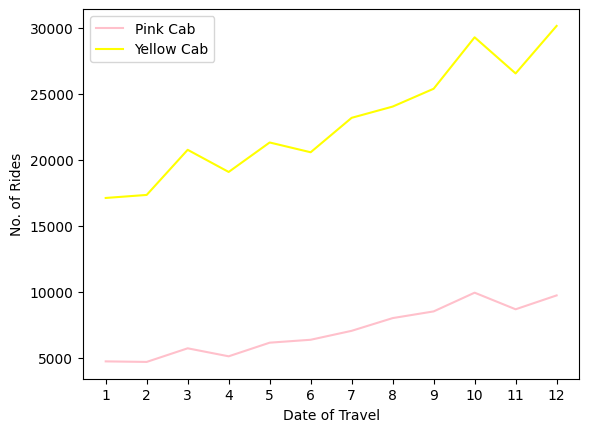

In [1435]:
Cab_Data_df['Date of Travel'] = [x.month for x in Cab_Data_df['Date of Travel']]
#print((Cab_Data_df['Date of Travel']).dtype)
monthly_no_rides_pc = []
monthly_no_rides_yc = []
months = []
for m in range(1,13):
  months.append(int("{0:0=2d}".format(m)))

for m in months:
  monthly_seasonality_pc_df = Cab_Data_df.groupby(['Company','Date of Travel']).get_group(('Pink Cab', m))
  monthly_seasonality_yc_df = Cab_Data_df.groupby(['Company','Date of Travel']).get_group(('Yellow Cab', m))
  monthly_no_rides_pc.append(len(monthly_seasonality_pc_df))
  monthly_no_rides_yc.append(len(monthly_seasonality_yc_df))

plt.plot(monthly_no_rides_pc, color='pink')
plt.plot(monthly_no_rides_yc, color='yellow')
plt.xlabel('Date of Travel')
plt.xticks(np.arange(12), [m for m in range(1,13) ] )
plt.ylabel('No. of Rides')
plt.legend(['Pink Cab','Yellow Cab'], loc = 2)

plt.show()


<AxesSubplot: xlabel='Date of Travel', ylabel='Price Charged'>

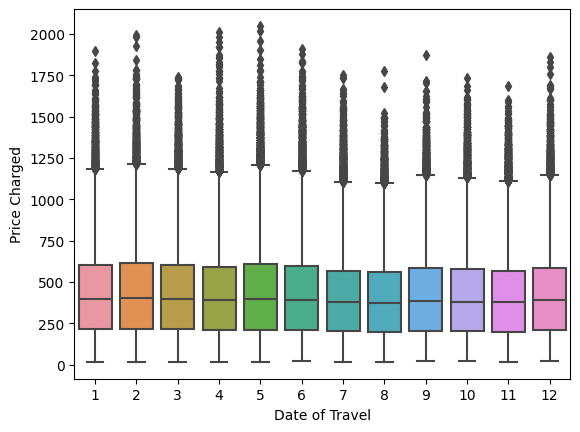

In [1436]:


sns.boxplot(x='Date of Travel', y='Price Charged', data = Cab_Data_df)

In [1437]:
pink_cab_df_cash_customers = len(pink_cab_df.groupby('Payment_Mode').get_group('Cash'))
pink_cab_df_card_customers = len(pink_cab_df.groupby('Payment_Mode').get_group('Card'))

data1 = [pink_cab_df_cash_customers  , pink_cab_df_card_customers ]


yellow_cab_df_cash_customers = len(yellow_cab_df.groupby('Payment_Mode').get_group('Cash'))
yellow_cab_df_card_customers = len(yellow_cab_df.groupby('Payment_Mode').get_group('Card'))

data2 = [ yellow_cab_df_cash_customers , yellow_cab_df_card_customers ]

 

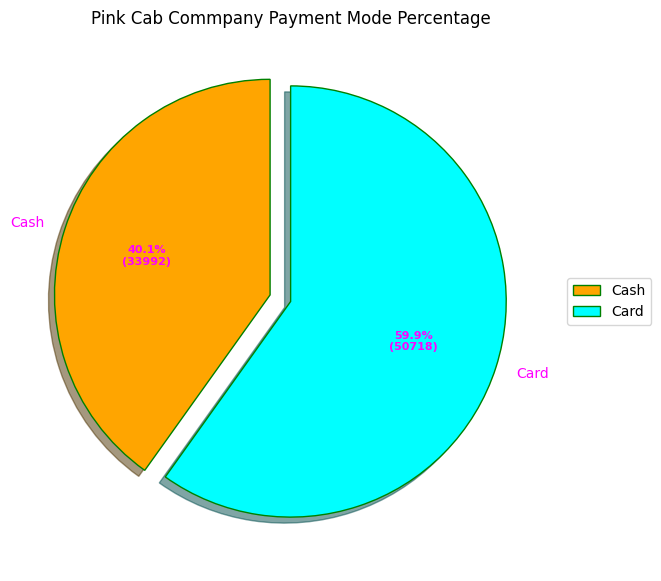

In [1438]:
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data1,
                                  autopct = lambda pct: func(pct, data1),
                                  explode = explode,
                                  labels = ['Cash', 'Card'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, ['Cash', 'Card'],
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Pink Cab Commpany Payment Mode Percentage")
 
# show plot
plt.show()


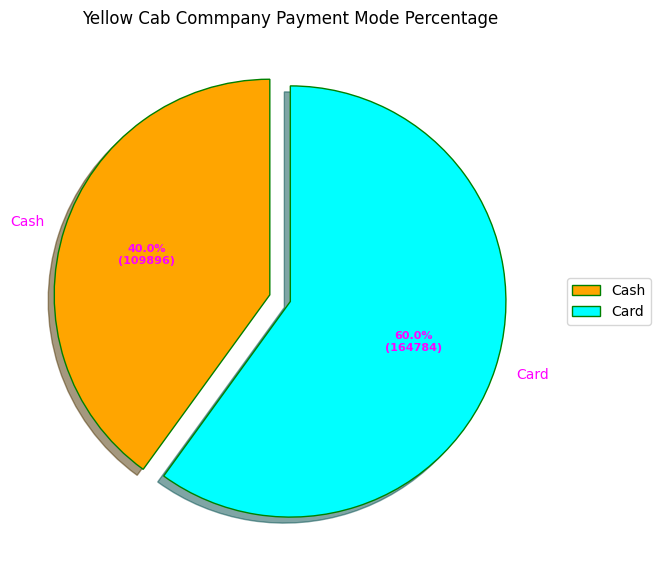

In [1439]:
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data2,
                                  autopct = lambda pct: func(pct, data2),
                                  explode = explode,
                                  labels = ['Cash', 'Card'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, ['Cash', 'Card'],
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Yellow Cab Commpany Payment Mode Percentage")
 
# show plot
plt.show()


In [1440]:
#Both companies has approximately same percentage of each payment mode of customers.
# Therefore, we coonclude that this has no effect on the overall profit of both companies

In [1441]:
def statResultfunction(p):
    prob = 0.95

    alpha = 1.0 - prob

    print('The alpha/significance level = %.3f' % alpha)

    print('The p-value is = %.2f' % p)

    #since the hypothesis is one-sided use p-value/2
    
    if p/2 < alpha:

        print('Reject the Null Hypothesis (Reject H0)')

    else:

        print('Accept the Null Hypothesis (Do not reject H0)')


In [1442]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [1443]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [1444]:
#Hypothesis Test 1
#Null Hypothesis: AVG Selling price Pink Cab == Yellow Cab Company
#I used the Kruskal-Wallis test since the data is neither normally distributed nor have equal variance

check_normality(pink_cab_df['Price Charged'])
check_normality(yellow_cab_df['Price Charged'])
check_variance_homogeneity(pink_cab_df['Price Charged'], yellow_cab_df['Price Charged'])
ttest,pvalue = stats.ttest_ind(pink_cab_df['Price Charged'],yellow_cab_df['Price Charged'])

statResultfunction(pvalue)

#Therefore, avg selling price of both companies are not be equal

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0)


In [1445]:
#Hypothesis Test 2
#Null Hypothesis:  AVG users' income  Yellow Cab <= Pink Cab Company
#I used t-test independence, we should have used matwhiney U test (but it did not work for me) since both sample are not normally distributed


check_normality(yellow_cab_df['Income (USD/Month)'])
check_normality(pink_cab_df['Income (USD/Month)'])
check_variance_homogeneity(yellow_cab_df['Income (USD/Month)'], pink_cab_df['Income (USD/Month)'])

ttest, pvalue = stats.ttest_ind(a=yellow_cab_df['Income (USD/Month)'], b=pink_cab_df['Income (USD/Month)'])

statResultfunction(pvalue)
#Therefore we conclude that there is no significance between user's income of both company

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0788
Fail to reject null hypothesis >> The variances of the samples are same.
The alpha/significance level = 0.050
The p-value is = 0.67
Accept the Null Hypothesis (Do not reject H0)


In [1446]:
#Hypothesis 3
pearsonr(City_df['Users'],City_df['Population'])
#Strong correlation between users and population regardless of company segregation since pvalue<0.005 and correlation coefficient is close to 1 

PearsonRResult(statistic=0.7033818983284993, pvalue=0.000540265155473829)

In [1447]:
#Hypothesis 4
#Null hypothesis: Average Age of yellow Cab Users <= Pink Cab Users
check_normality(yellow_cab_df['Age'])
check_normality(pink_cab_df['Age'])
check_variance_homogeneity(yellow_cab_df['Age'], pink_cab_df['Age'])

ttest, pvalue = stats.ttest_ind(a=yellow_cab_df['Age'], b=pink_cab_df['Age'])
print(stats.ttest_ind(a=yellow_cab_df['Age'], b=pink_cab_df['Age']))


statResultfunction(pvalue)
#We can conclude that yellow cab users age has no signifcance to pink cab users but mostl likeley to be younger than Pink cab users

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.1013
Fail to reject null hypothesis >> The variances of the samples are same.
Ttest_indResult(statistic=0.3777700356771092, pvalue=0.7056016582376317)
The alpha/significance level = 0.050
The p-value is = 0.71
Accept the Null Hypothesis (Do not reject H0)


In [1448]:
#Hypothesis 5
#Null Hypothesis: Mean Profit of yello cab <= pink cab
check_normality(yellow_cab_df['Profit'])
check_normality(pink_cab_df['Profit'])
check_variance_homogeneity(yellow_cab_df['Profit'], pink_cab_df['Profit'])

ttest, pvalue = stats.ttest_ind(a=yellow_cab_df['Profit'], b=pink_cab_df['Profit'])
print(stats.ttest_ind(a=yellow_cab_df['Profit'], b=pink_cab_df['Profit']))


statResultfunction(pvalue)
#We conclude that mean profit of yellow cab is higher than that of pink cab and there is a significant difference

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.
Ttest_indResult(statistic=160.3715175947807, pvalue=0.0)
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0)
